In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [12]:
with open('feeds.json', 'r') as f:
    js = json.load(f)['feeds']

time = []
temp=  []
volt = []
rawTDS = []
stdTDS = []

for i in js:
    time.append(i['created_at'])
    temp.append(i['field1'])
    volt.append(i['field2'])
    rawTDS.append(i['field3'])
    stdTDS.append(i['field4'])

time= np.array(time)
temp=  np.array(temp).astype('float')
volt = np.array(volt).astype('float')
rawTDS = np.array(rawTDS).astype('float')
stdTDS = np.array(stdTDS).astype('float')

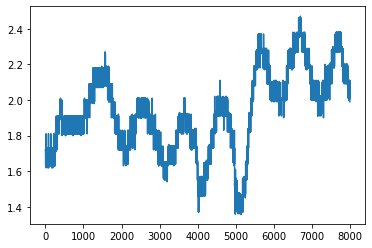

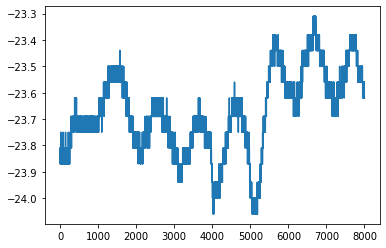

-24.06
0.75
1.3599999999999994


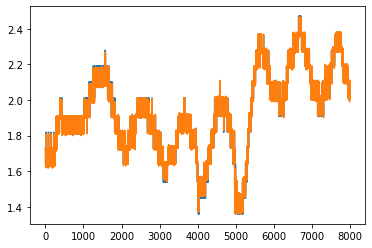

In [13]:
plt.plot(np.array(stdTDS).astype('float') - np.array(rawTDS).astype('float'))
plt.show()
t2 = temp.copy()
plt.plot(-t2)
plt.show()

t2 *= -1
print(np.min(t2))
t2 -= np.min(t2)
print(np.max(t2) -np.min(t2))
t2 *= (np.max(stdTDS - rawTDS) - np.min(stdTDS - rawTDS)) / np.max(t2) - np.min(t2)
print(np.min(stdTDS - rawTDS))
t2 += np.min(stdTDS - rawTDS)
plt.plot(t2)
plt.plot(np.array(stdTDS).astype('float') - np.array(rawTDS).astype('float'))
plt.show()


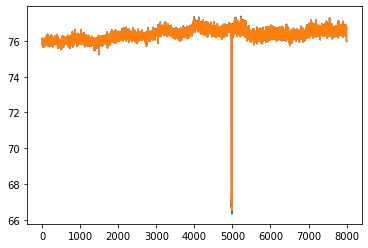

In [14]:
plt.plot(stdTDS)
plt.plot(rawTDS + (-temp + 23.87)*1.51 +  1.63 )

## Analysis: 
The corrected value of the TDS sensor is obtained as follows:

given: 
    - rawTDS: TDS value wothout corrections
    - temp: temperature reading
    - stdTDS: TDS value after correction

stdTDS = (rawTDS + (-temp + 23.87)*1.51 +  1.63)

with mean absolute difference of 0.003760399...

In [15]:
meanErr = np.mean(np.abs(stdTDS - (rawTDS + (-temp + 23.87)*1.51 +  1.63)))
meanErr

0.01011336250000064

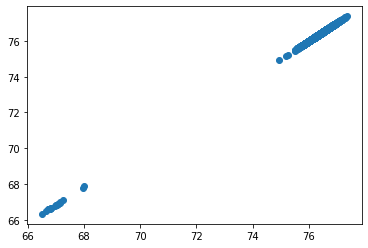

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

newRaw = np.array(rawTDS + (-temp + 23.87)*1.51 +  1.63).astype('float')
#newRaw = np.array(time)
plt.scatter(newRaw, stdTDS)

As is it seen, the calculated TDS vs standard TDS is pretty much a linear plot. We will be using Linear Regression to be able to get stdTDS directly from raw TDS and temperature.

In [18]:
rawTrain, rawTest, STDTrain, STDTest = train_test_split(newRaw, stdTDS)

LR = LinearRegression()
LR.fit(rawTrain.reshape(-1,1), STDTrain)

LinearRegression()

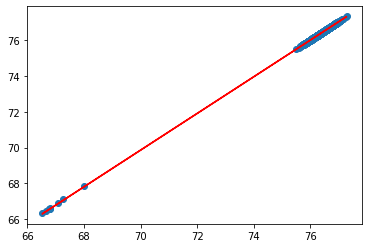

In [19]:
predicted = LR.predict(rawTest.reshape(-1,1))
plt.scatter(rawTest, STDTest)
plt.plot(rawTest, predicted, color='r')
plt.show()

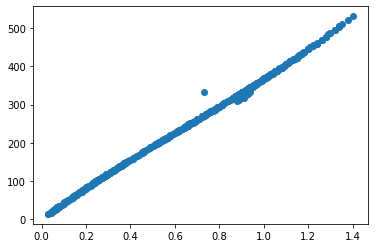

In [48]:
csvarr = np.genfromtxt('Final DataSet-Unclean.csv', delimiter=',')
csvSTD = []
csvRAW = []
temp2 = []
volt2 = []

for i in csvarr:
    csvSTD.append(i[4])
    csvRAW.append(i[3])
    volt2.append(i[2])
    temp2.append(i[1])

temp2 = np.array(temp2).astype('float')
volt2 = np.array(volt2).astype('float')
csvRAW = np.array(csvRAW).astype('float')
csvSTD = np.array(csvSTD).astype('float')

#rawRAW = np.array(csvRAW + (-temp2 + 23.87)*1.51 +  1.63).astype('float')
plt.scatter(volt2, csvRAW)

#plt.scatter(volt, rawTDS)

In [62]:
csvRAW = csvRAW[~np.isnan(volt2)]
volt2 = volt2[~np.isnan(volt2)]

print(np.any(np.isnan(volt2)))

rawTrain, rawTest, STDTrain, STDTest = train_test_split(volt2, csvRAW)

LR = LinearRegression()
LR.fit(rawTrain.reshape(-1,1), STDTrain)

False


LinearRegression()

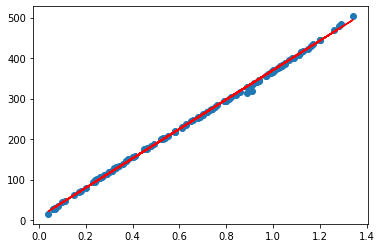

In [63]:
predicted = LR.predict(rawTest.reshape(-1,1))
plt.scatter(rawTest, STDTest)
plt.plot(rawTest, predicted, color='r')
plt.show()